#  Model Evaluation and Selection

Now that we have a good understaning of the data we will first begin by creating models using the data and estimate their accuracy on the test data set. Based on the literature the most commonly used alogrithms for prediciting heart disease are:
1. Naive Bayes(Gaussian)
2. KNN
3. Support Vector Machines
4. Artifical Neural Networks

In this project we will first:
  1. Split the data into a training and test set using a 70 : 30 split (train:test).
  2. Measure unbiased estimation of each models prediction using the 10-fold crossvalidation method.
  3. Build the 4 models.
  4. Select the best model and then perform further feature enhancements.


### Import Libraries

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

### Load and Explore the Dataset

In [ ]:
# Load the cleaned data csv file
data = pd.read_csv('/content/drive/MyDrive/Diagnostic-model-for-predicting-Cardiovascular-Disease-Risk-master/Diagnostic-model-for-predicting-Cardiovascular-Disease-Risk-master/data_cleaned.csv',index_col='Unnamed: 0')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check the head of the dataframe
data.head()

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


### Splitting the Data into a Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
# Declare the independent (X) and dependent(y) variables
X= data[['Age', 'Sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y= data['num']

# Split the dataset using a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#Check the shape of each variable, remember the X variable must be in matrix form and the y varibale a vector
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((216, 13), (216,), (54, 13), (54,))

At this point feature scaling is performed to standardize or normalize the data to ensure that no one variable dominates the other and their properties follow a standard normal distribution centered around 0.

# Feature Scaling: Normalization
This step is critical to ensure that no one variable dominates the other and their properties follow a standard normal distribution centered around 0.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_sc = StandardScaler()

In [ ]:
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

In [ ]:
X_train.shape

(216, 13)

# Train the Models

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# Function to automate fitting and spot checking models
def classifer(model,train_x,train_y,test,true):
    model.fit(train_x,train_y)
    prediction= model.predict(X_test)
    print(classification_report(true,prediction))
    #print('The accuracy of this model is: %s' % '{0:.3%}'.format(accuracy_score(true,prediction)))

    # Create confusion matrix plot
    cm = confusion_matrix(y_test,prediction)
    fig= plot_confusion_matrix(conf_mat=cm,figsize=(4,4),cmap=plt.cm.Reds,hide_spines=True)
    plt.title('Confusion Matrix',fontsize=14)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.grid('off')

    # 10-fold Cross Validation
    accuracies = cross_val_score(estimator= model,X= X_train,y=y_train,cv=10)
    print("The average model accuracy score is : %s" % "{0:.3%}".format(accuracies.mean()))
    print("The average accuracy score standard deviation is : %s" % "{0:.3%}".format(accuracies.std()))



**Choose and fit models on the training set.**

# Naive Bayes Classifer

In [ ]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.71      0.71      0.71        24

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54

The average model accuracy score is : 86.602%
The average accuracy score standard deviation is : 8.407%


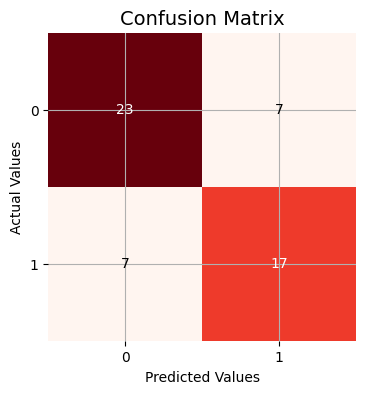

In [ ]:
nb_classifier = GaussianNB()
classifer(nb_classifier,X_train,y_train,X_test,y_test)

# K-Nearest Neigbhor Classifier(KNN)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.73      0.67      0.70        24

    accuracy                           0.74        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

The average model accuracy score is : 83.355%
The average accuracy score standard deviation is : 6.568%


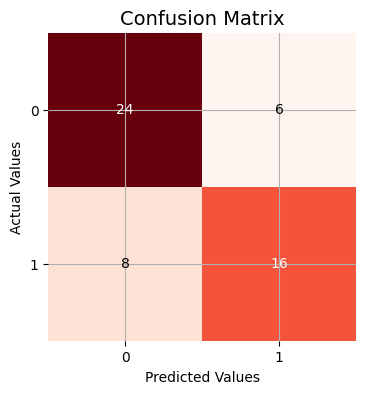

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
classifer(knn_classifier,X_train,y_train,X_test,y_test)

# Support Vector Machines(SVM)


In [ ]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.74      0.71      0.72        24

    accuracy                           0.76        54
   macro avg       0.76      0.75      0.76        54
weighted avg       0.76      0.76      0.76        54

The average model accuracy score is : 85.238%
The average accuracy score standard deviation is : 7.878%


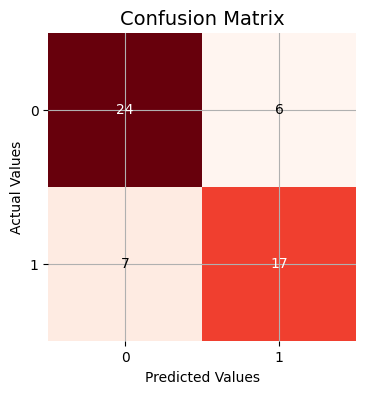

In [ ]:
svc_classifier = SVC(kernel='linear')
classifer(svc_classifier,X_train,y_train,X_test,y_test)

# Artificial Neural Network(ANN)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Building of this ANN will be done the long way during the model evaluation phase
# Intializer ANN
ann_classifier = Sequential()

# Add input and first hidden layers
# ann_classifier.add(Dense(output_dim =7,init='uniform',activation='relu',input_dim=13))
ann_classifier.add(Dense(activation="relu", input_dim=13, units=7, kernel_initializer="uniform"))

#second hidden layers
# ann_classifier.add(Dense(output_dim=7,init='uniform',activation='relu'))
ann_classifier.add(Dense(activation="relu", units=7, kernel_initializer="uniform"))

# Create output layer
# ann_classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
ann_classifier.add(Dense(activation="sigmoid", units=2, kernel_initializer="uniform"))

# Compile the ANN
ann_classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann_classifier.add(Dense(activation="relu", units=7,kernel_initializer="uniform"))
ann_classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
ann_classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit ANN to training set

ann_classifier.fit(np.array(X_train),np.array(y_train),batch_size=10,epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5278
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5556
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5556
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5556
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5556
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5556
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5556
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5556
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5556
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5556
Epoch 11/

In [ ]:
# Make predictions

ann_predict = ann_classifier.predict(np.array(X_test))

2/2 [==============================] - 0s 6ms/step


In [ ]:
# Beacuse the data generated are probabilities we have to convert them to numpy arrays before we populate the model performance metrics
# The probabilities are first converted to true(heart disease) or false(no heart disease), but because this is a medical problem we chose a higher probability (70%)

ann_predict = (ann_predict>0.7)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.72      0.75      0.73        24

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



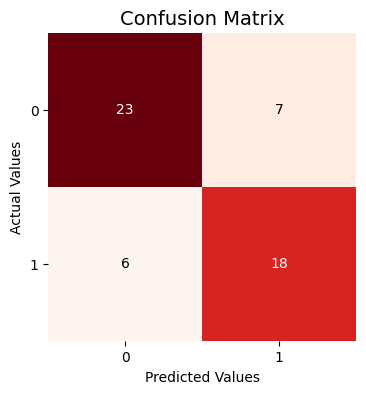

In [ ]:
#Print the classification report

print(classification_report(np.array(y_test),ann_predict))

# Create confusion matrix plot

cm_nn = confusion_matrix(y_test,ann_predict)
_=fig= plot_confusion_matrix(conf_mat=cm_nn,figsize=(4,4),cmap=plt.cm.Reds,hide_spines=True)
_=plt.title('Confusion Matrix',fontsize=14)
_=plt.xlabel('Predicted Values')
_=plt.ylabel('Actual Values')


In [ ]:
Model_comparision={'Naive Bayes':{'10-fold crossvalidaion accuracy score':'86.854%','Standard Deviation':'9.207%'},
                   'KNN':{'10-fold crossvalidaion accuracy score':'61.053%','Standard Deviation':'8.028%'},
                   'SVM':{'10-fold crossvalidaion accuracy score':'83.746%','Standard Deviation':'8.021%'},
                   'ANN':{'10-fold crossvalidaion accuracy score':'91.005%  ','Standard Deviation':'0.000%'},
                  }
Model_comparision = pd.DataFrame(Model_comparision)
Model_comparision

,Naive Bayes,KNN,SVM,ANN
10-fold crossvalidaion accuracy score,86.854%,61.053%,83.746%,91.005%
Standard Deviation,9.207%,8.028%,8.021%,0.000%


### Conclusion:
Among the four models we tested, the Artificial Neural Network (ANN) algorithm delivered the best performance, achieving an accuracy score of 91.005% on the training set and 81% on the test set. It's worth noting that these results were obtained without any parameter tuning, feature selection, dimensionality reduction, or model optimization. However, it's important to consider the possibility of overfitting, which suggests that the model may have learned the training data exceptionally well but struggles to generalize effectively to the test data.

As a result, the model that consistently produced reliable results and performed comparably on both datasets is the Naive Bayes algorithm. In the following section, we will focus on tuning this model to explore the potential for achieving an even higher accuracy in predicting heart disease. Additionally, we will test this accuracy on other datasets from the UCI repository's heart directory to verify and validate these findings.